### Fuzzy Triangular Membership Functions


#### Version 1.0

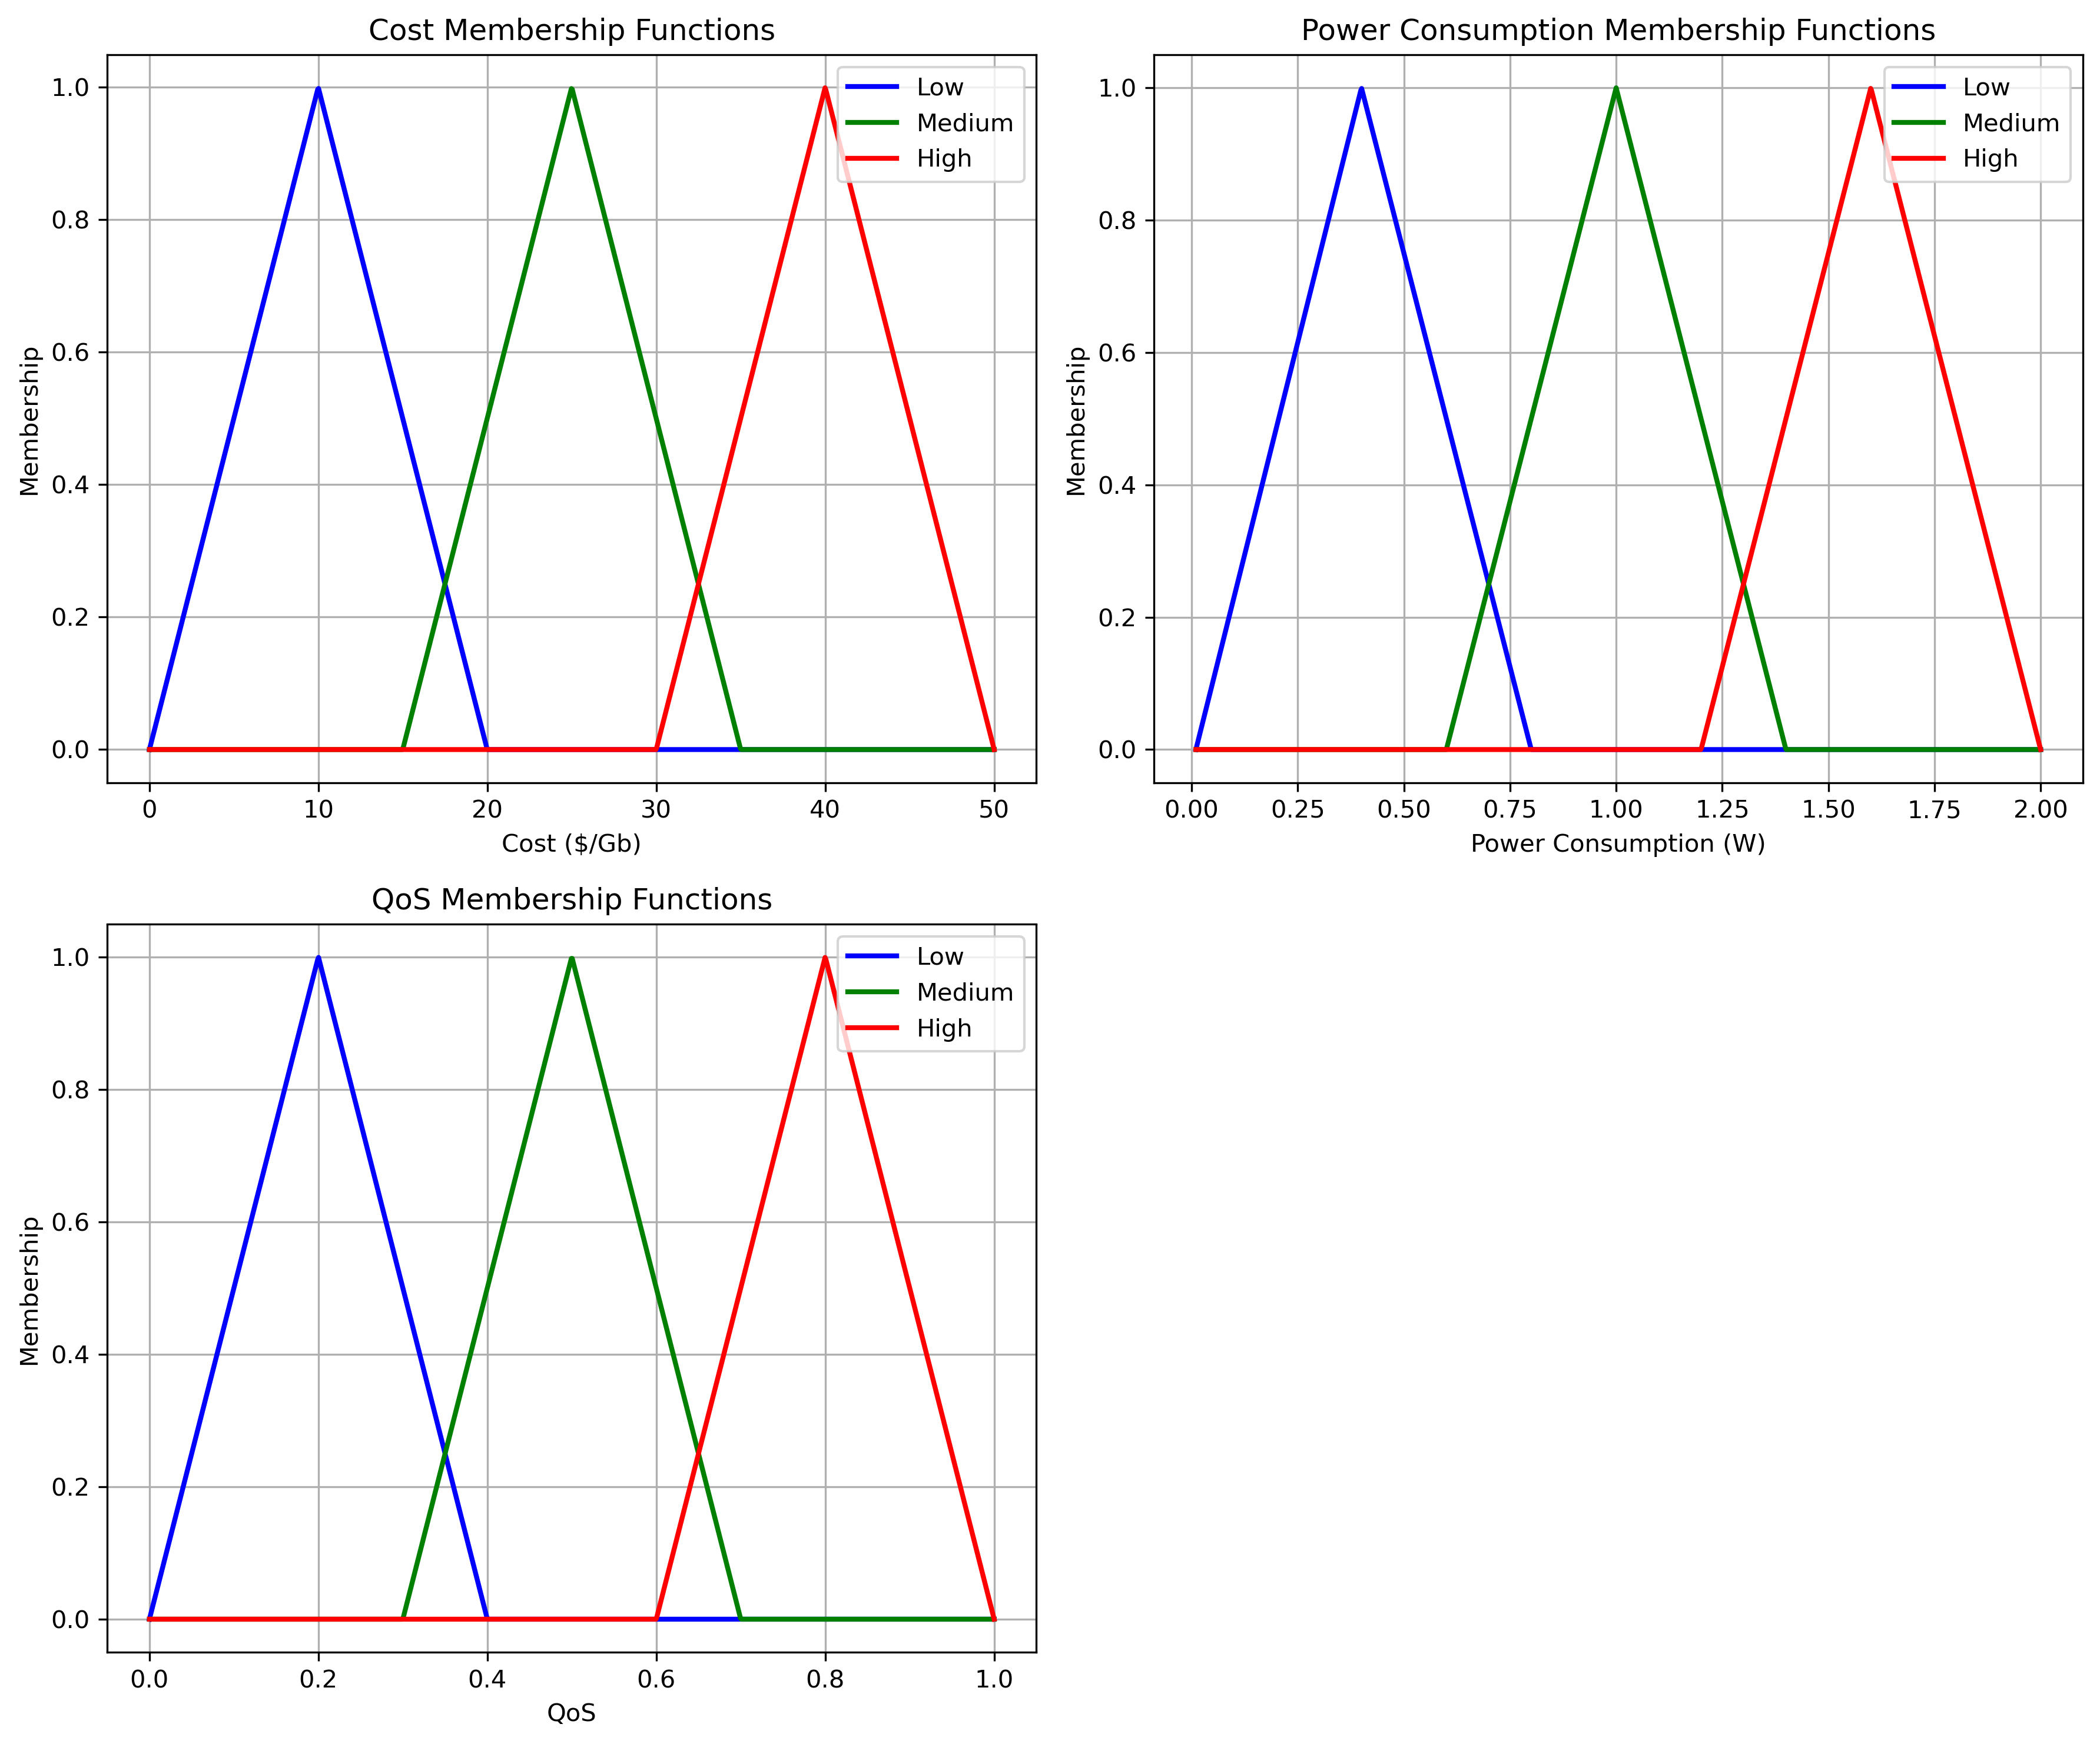

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Image


def triangular_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Membership')
    ax.legend()
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 50 $/Gb)
x_cost = np.linspace(0.01, 50, 1000)
cost_low = triangular_mf(x_cost, 0.01, 10, 20)
cost_medium = triangular_mf(x_cost, 15, 25, 35)
cost_high = triangular_mf(x_cost, 30, 40, 50)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 2 W)
x_power = np.linspace(0.01, 2, 1000)
power_low = triangular_mf(x_power, 0.01, 0.4, 0.8)
power_medium = triangular_mf(x_power, 0.6, 1, 1.4)
power_high = triangular_mf(x_power, 1.2, 1.6, 2)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = triangular_mf(x_qos, 0, 0.2, 0.4)
qos_medium = triangular_mf(x_qos, 0.3, 0.5, 0.7)
qos_high = triangular_mf(x_qos, 0.6, 0.8, 1)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout and display the plots
#plt.tight_layout()
#plt.show()

# Adjust the layout
plt.tight_layout()

# Save the figure
filename = 'membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
display(Image(filename=filename))

# Optional: Close the figure to free up memory
plt.close(fig)

#### Version 1.1


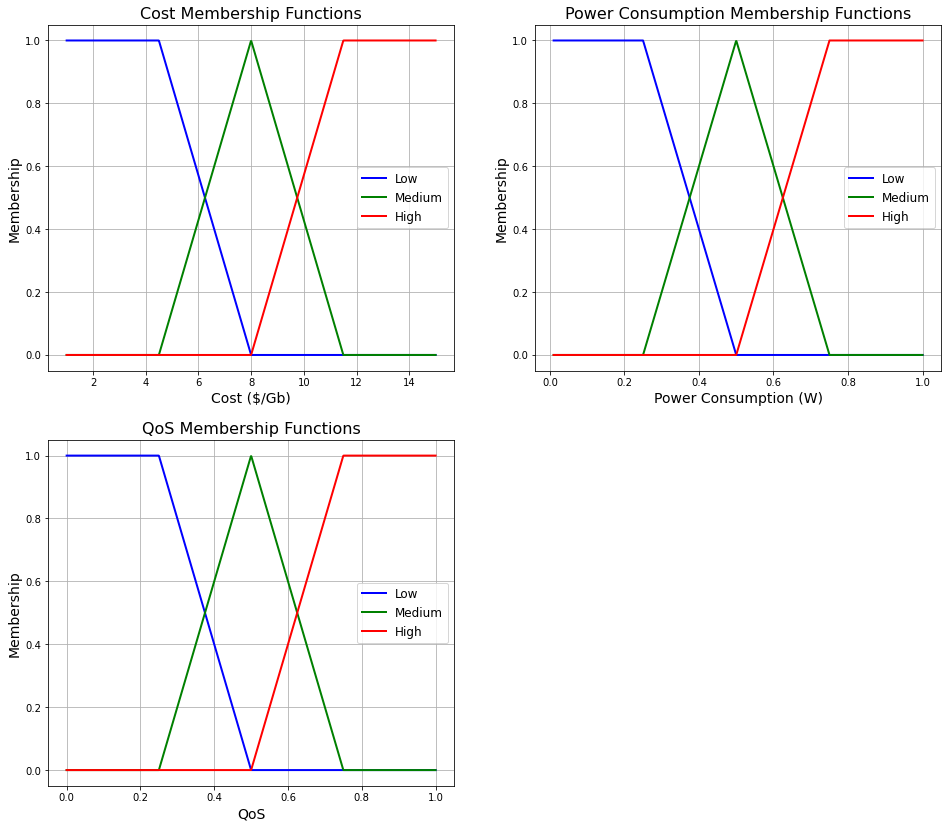

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

def low_mf(x, a, b):
    return np.where(x <= a, 1, np.maximum(0, (b - x) / (b - a)))

def medium_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def high_mf(x, b, c):
    return np.where(x >= c, 1, np.maximum(0, (x - b) / (c - b)))

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Membership', fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 14))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 15 $/Gb)
x_cost = np.linspace(1, 15, 1000)
cost_low = low_mf(x_cost, 4.5, 8)
cost_medium = medium_mf(x_cost, 4.5, 8, 11.5)
cost_high = high_mf(x_cost, 8, 11.5)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 1 W)
x_power = np.linspace(0.01, 1, 1000)
power_low = low_mf(x_power, 0.25, 0.5)
power_medium = medium_mf(x_power, 0.25, 0.5, 0.75)
power_high = high_mf(x_power, 0.5, 0.75)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = low_mf(x_qos, 0.25, 0.5)
qos_medium = medium_mf(x_qos, 0.25, 0.5, 0.75)
qos_high = high_mf(x_qos, 0.5, 0.75)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout
#plt.tight_layout()

# Save the figure
filename = 'fuzzy_membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
#display(Image(filename=filename))

# Close the figure to free up memory

plt.show()
plt.close(fig)

### AHP 
##### Pairwise Matrices

In [4]:
voip = np.matrix([
    [1,	5,	3,	7],
    [0.200,	1,	0.333,	3],
    [0.333,	3,	1,	5],
    [0.143,	0.333,	0.200,	1]
])

vs = np.matrix([
    [1,	3,	0.333,	0.200],
    [0.333,	1,	0.200,	0.200],
    [3,	5,	1,	0.333],
    [5,	5,	3,	1]
])

cg = np.matrix([
    [1,	3,	5,	7],
    [0.33,	1,	3,	5],
    [0.200,	0.333,	1,	3],
    [0.143,	0.200,	0.333, 1]
])	

ei = np.matrix([
    [1,	1,	1,	1],
    [1,	1,	1,	1],
    [1,	1,	1,	1],
    [1,	1,	1,	1]
])

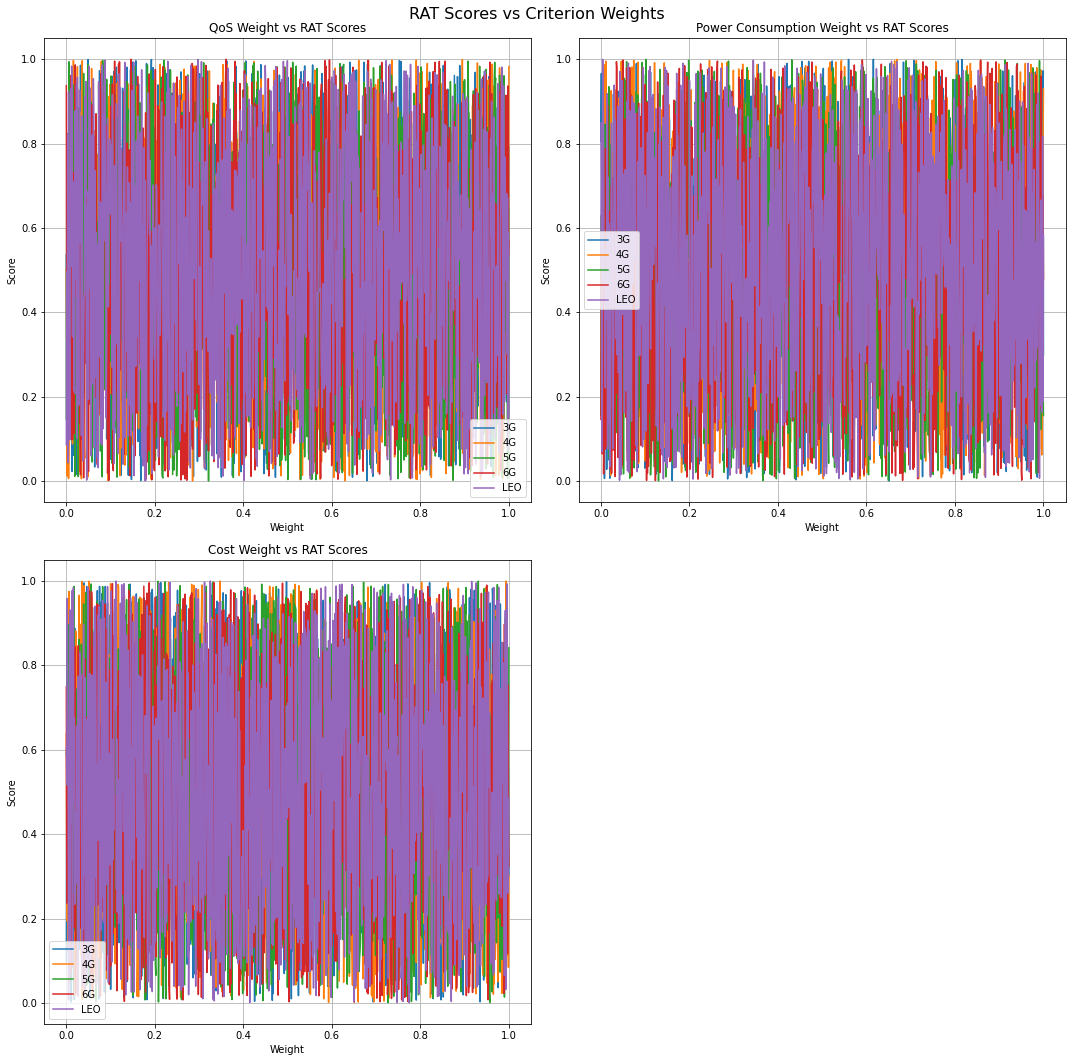

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data (replace this with your actual data)
num_samples = 1000
criteria = ['QoS', 'Power Consumption', 'Cost']
rats = ['3G', '4G', '5G', '6G', 'LEO']
weights = np.linspace(0, 1, num_samples)

# Generate random data for demonstration
M = np.random.rand(3, num_samples, 5)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('RAT Scores vs Criterion Weights', fontsize=16)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Colors for each RAT
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each criterion
for i, criterion in enumerate(criteria):
    ax = axs[i]
    for j, rat in enumerate(rats):
        ax.plot(weights, M[i, :, j], label=rat)
    
    ax.set_xlabel('Weight')
    ax.set_ylabel('Score')
    ax.set_title(f'{criterion} Weight vs RAT Scores')
    ax.legend()
    ax.grid(True)

# Remove the unused subplot
axs[3].remove()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [6]:
plt.plot(thresholds, num_rats_selected, drawstyle='steps-post', marker='o', label='RAT Selection')
plt.xlabel('Threshold (%)')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'thresholds' is not defined

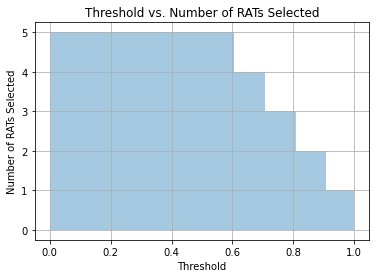

In [17]:
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 100)  # Continuous threshold from 0% to 100%
# Example data
def calculate_rats_selected(threshold):
    if threshold >= 0.9:
        return 1
    elif threshold >= 0.8:
        return 2
    elif threshold >= 0.7:
        return 3
    elif threshold >= 0.6:
        return 4
    else:
        return 5
num_rats_selected = [1, 1, 2, 3, 4, 5]
rats_selected = [calculate_rats_selected(t) for t in thresholds]  # Discrete steps based on threshold

plt.fill_between(thresholds, rats_selected, step='post', alpha=0.4)  # Area plot
plt.xlabel('Threshold')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected')
plt.grid(True)
plt.show()


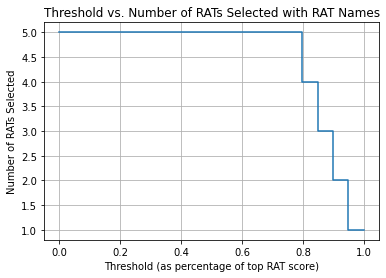

In [19]:
# Sample data: RAT scores and names
ranked_rats = [
    {'name': 'RAT1', 'score': 95},
    {'name': 'RAT2', 'score': 90},
    {'name': 'RAT3', 'score': 85},
    {'name': 'RAT4', 'score': 80},
    {'name': 'RAT5', 'score': 75}
]

# Function to simulate selection based on a continuous threshold
def calculate_rats_selected(threshold):
    selected_rats = [rat['name'] for rat in ranked_rats if rat['score'] >= threshold * ranked_rats[0]['score']]
    return len(selected_rats), selected_rats  # Return the number and names of selected RATs

# Generate thresholds from 0% to 100%
thresholds = np.linspace(0, 1, 100)
rats_selected = []
rat_names_at_threshold = []

# Loop through the thresholds and determine how many RATs and their names are selected
for t in thresholds:
    num_rats, selected_names = calculate_rats_selected(t)
    rats_selected.append(num_rats)
    rat_names_at_threshold.append(selected_names)

# Create the step plot
plt.step(thresholds, rats_selected, where='post')

# Add RAT names as annotations at key threshold points (optional: choose every nth point or significant changes)
# for i, threshold in enumerate(thresholds):
#     if i % 10 == 0 or i == len(thresholds) - 1:  # Annotate every 10th point for readability
#         plt.text(threshold, rats_selected[i], f"{', '.join(rat_names_at_threshold[i])}", fontsize=8)

# Set labels and title
plt.xlabel('Threshold (as percentage of top RAT score)')
plt.ylabel('Number of RATs Selected')
plt.title('Threshold vs. Number of RATs Selected with RAT Names')
plt.grid(True)

plt.show()


In [25]:
import numpy as np

def identify_constant_columns(matrix):
  """
  Identifies constant columns in a matrix.

  Args:
    matrix: A NumPy array.

  Returns:
    A list of column indices that have constant values.
  """

  constant_columns = []
  for col_idx in range(matrix.shape[1]):
    if np.all(matrix[:, col_idx] == matrix[0, col_idx]):
      constant_columns.append(col_idx)
  return constant_columns

# Example usage:
matrix = np.array([[1, 2, 3],
                   [1, 2, 3],
                   [1, 3, 3]])

constant_cols = identify_constant_columns(matrix)
constant_cols
np.random.uniform()

0.1935952132448927

In [36]:
import numpy as np

# Create a one-dimensional array with 100 elements
array_1d = np.arange(100)  # Example: [0, 1, 2, ..., 99]

# Reshape the array into a 10x10 matrix
matrix_2d = array_1d.reshape(10, 10)

# Display the matrix
print(matrix_2d)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


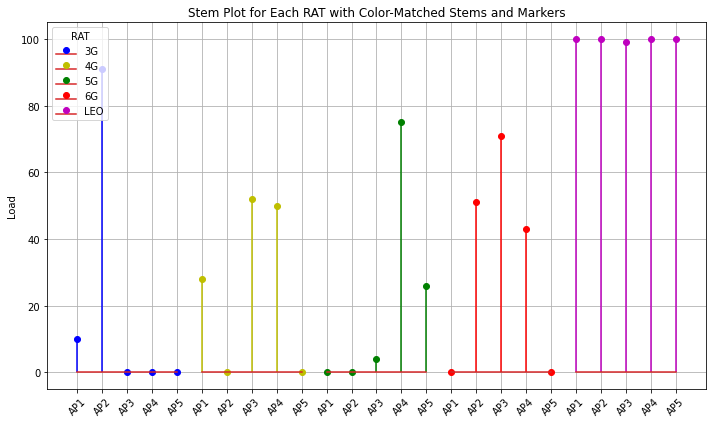

,AP1,AP2,AP3,AP4,AP5
3G,10.0,91.0,0.0,0.0,0.0
4G,28.0,0.0,52.0,50.0,0.0
5G,0.0,0.0,4.0,75.0,26.0
6G,0.0,51.0,71.0,43.0,0.0
LEO,100.0,100.0,99.0,100.0,100.0


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame from the given data
data = {
    'AP1': [10.0, 28.0, 0.0, 0.0, 100.0],
    'AP2': [91.0, 0.0, 0.0, 51.0, 100.0],
    'AP3': [0.0, 52.0, 4.0, 71.0, 99.0],
    'AP4': [0.0, 50.0, 75.0, 43.0, 100.0],
    'AP5': [0.0, 0.0, 26.0, 0.0, 100.0]
}

index_labels = ['3G', '4G', '5G', '6G', 'LEO']
df = pd.DataFrame(data, index=index_labels)

# Set the figure size
plt.figure(figsize=(10, 6))

# Define colors for each RAT
colors = ['b', 'y', 'g', 'r', 'm']  # Blue, Green, Red, Cyan, Magenta

# Number of APs
num_aps = len(df.columns)

# Plot a stem plot for each row with matching colors
for i, (index, row) in enumerate(df.iterrows()):
    x_positions = np.arange(num_aps) + i * num_aps  # Adjust x positions for each RAT
    # Use the same color for the stem and the marker
    plt.stem(x_positions, row.values, linefmt=colors[i], markerfmt=f'{colors[i]}o', label=index)

# Customizing x-ticks to show AP labels
plt.xticks(np.arange(num_aps * len(df)), np.tile(row.index, len(df)), rotation=45)

# Adding labels, title, and legend
#plt.xlabel('Access Points (APs)')
plt.ylabel('Load')
plt.title('Stem Plot for Each RAT with Color-Matched Stems and Markers')
plt.legend(title='RAT', loc='upper left')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

df


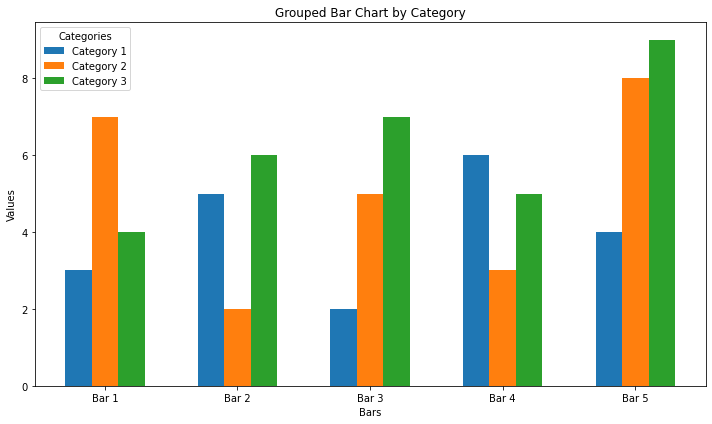

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
data = {
    'Category 1': [3, 5, 2, 6, 4],
    'Category 2': [7, 2, 5, 3, 8],
    'Category 3': [4, 6, 7, 5, 9]
}

# Number of bars in each category
num_bars = len(data['Category 1'])
bar_width = 0.2  # Width of each bar

# Set up positions for each category's bars
x = np.arange(num_bars)  # x positions for the bars

# Create the bar chart
plt.figure(figsize=(10, 6))

# Plot each category's bars
for i, (category, values) in enumerate(data.items()):
    plt.bar(x + i * bar_width, values, width=bar_width, label=category)

# Add labels, title, and legend
plt.xlabel('Bars')
plt.ylabel('Values')
plt.title('Grouped Bar Chart by Category')
plt.xticks(x + bar_width, [f'Bar {i+1}' for i in range(num_bars)])  # Set x-ticks
plt.legend(title='Categories')
plt.tight_layout()

# Show the plot
plt.show()


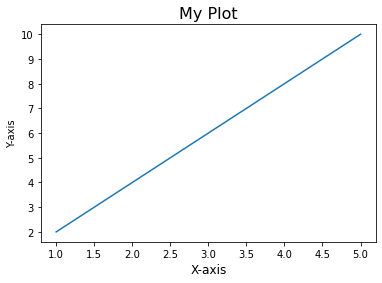

In [76]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create a plot
plt.plot(x, y)

# Set labels and title with increased font size
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis')
plt.title('My Plot', fontsize=16)

# Show the plot
plt.show()

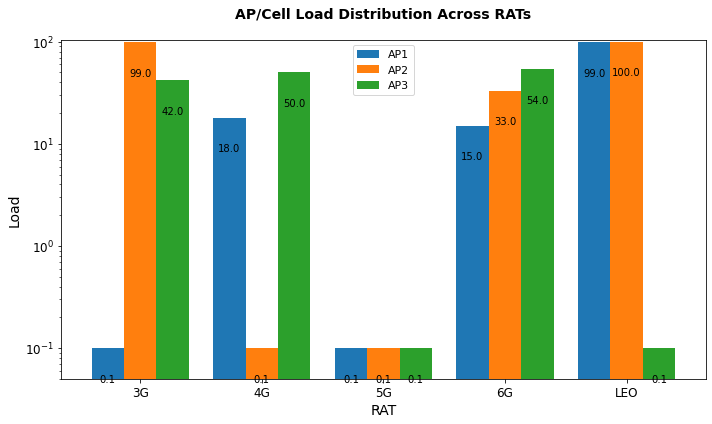

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_loadperaprat is your existing DataFrame
# If you don't have it defined, you can create a sample one:
df_loadperaprat = pd.DataFrame({
    'AP1': [0, 18, 0, 15, 99],
    'AP2': [99, 0, 0, 33, 100],
    'AP3': [42, 50, 0, 54, 0]
}, index=['3G', '4G', '5G', '6G', 'LEO'])

# Replace zero values with a small number
small_value = 0.1
df_plot = df_loadperaprat.replace(0, small_value)

# Create the plot
ax = df_plot.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('AP/Cell Load Distribution Across RATs\n', fontsize=14, fontweight='bold')
plt.ylabel('Load', fontsize=14)
plt.xlabel('RAT', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=11)

# Adjust y-axis to start slightly below the smallest value
plt.ylim(bottom=small_value/2)

# Use a logarithmic scale for the y-axis
plt.yscale('log')

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center')

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Define colors for each RAT
# colors = ['b', 'y', 'g', 'r', 'm']  # Blue, Yellow, Green, Red, Magenta

# # Number of APs
# num_aps = len(df_loadperaprat.columns)

# # Plot a stem plot for each row with matching colors
# for i, (index, row) in enumerate(df_loadperaprat.iterrows()):
#     x_positions = np.arange(num_aps) + i * num_aps  # Adjust x positions for each RAT
#     # Use the same color for the stem and the marker
#     plt.stem(x_positions, row.values, linefmt=colors[i], markerfmt=f'{colors[i]}o', label=index, basefmt=f'{colors[i]}')

# # Customizing x-ticks to show AP labels
# plt.xticks(np.arange(num_aps * len(df_loadperaprat)), np.tile(row.index, len(df_loadperaprat)), rotation=90, fontsize=11)
# plt.yticks(fontsize=11)
# # Adding labels, title, and legend
# plt.xlabel('\nAP/Cell', fontsize=13)
# plt.ylabel('Load', fontsize=13)
# plt.title('AP/Cell Load Distribution Across RATs\n', fontsize=14, fontweight='bold')
# plt.legend(loc='upper left', fontsize=11)
# plt.grid()

# # Show the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# number of AP/BSs per RAT
M  = 5
# number of simultaneous connections per UE
MC = 10
# number of users
U = 100

selected_rats = filterRATs(rat_scores,0.0,RATs).columns # equal importance RAT scores
no_select_rats = selected_rats.size

# Create a matrix of AP/BS criteria values for each RAT

aps = np.zeros((no_select_rats, M, ap_dm.shape[1]))
all_aps = np.zeros((no_select_rats*M, ap_dm.shape[1]))
aps_rat = np.zeros((no_select_rats*M, ap_dm.shape[1]+1))

cell_nos = np.ones(no_select_rats*M, dtype=np.int64)
modified_AP_matrix = np.zeros((no_select_rats,M))

rat_ap = []
ap_names = []

# initial criteria values for the APs decision matrix 

for i in range(no_select_rats):
    rat = selected_rats[i]
    selected_row = dm_df[dm_df.iloc[:, 0] == rat].iloc[0][7:].values.astype(np.float64)
    rat_ap += [rat] * M
    for j in range(M):
        selected_row[2] = randomSINR() # 
        aps[i, j] = selected_row
        all_aps[j+i*M] = selected_row
        aps_rat[j+i*M] = np.append(selected_row, rat_scores[i])
        cell_nos[j+i*M] = j+1

# print(all_aps)
# print(aps_rat)

# Create a dictionary to store the number of users per RAT
usersperrat = {rat: 0 for rat in selected_rats}
usersperrat_rat = {rat: 0 for rat in selected_rats}

for i in range(U):
    norm_ap = minmaxNormalize(all_aps, crit_types[6:])
    weights = criticWeighting(all_aps)
    ap_scores = computerSAW(norm_ap,weights)
    
    #print(np.append(crit_types[6:], 'up'))
    norm_aprat = minmaxNormalize(aps_rat, np.append(crit_types[6:], 'up'))
    weights_aprat = criticWeighting(aps_rat)
    aprat_scores = computerSAW(norm_aprat,weights_aprat)    

    df = pd.DataFrame(list(zip(cell_nos,ap_scores)),index=rat_ap)
    ap_ranks = df.sort_values(by=1, ascending=False)

    df_aprat = pd.DataFrame(list(zip(cell_nos,aprat_scores)),index=rat_ap)
    aprat_ranks = df_aprat.sort_values(by=1, ascending=False)

    # updating the load criteria on the AP matrix after selection
    for j in range(MC): # top C AP are selected
        rat = ap_ranks.iloc[j].name
        rat_index = np.where(selected_rats == rat)[0][0]
        ap_index = ap_ranks.iloc[j].values[0].astype(np.int64) - 1

        #update the load criteria
        all_aps[ap_index + rat_index*M][0] += 1 
        usersperrat[rat] += 1

        ap_rat = aprat_ranks.iloc[j].name
        ap_rat_index = np.where(selected_rats == ap_rat)[0][0]
        ap_ap_index = aprat_ranks.iloc[j].values[0].astype(np.int64) - 1

        #update the load criteria
        aps_rat[ap_ap_index + ap_rat_index*M][0] += 1
        usersperrat_rat[ap_rat] += 1


# create a list of AP names
for i in range(M):
    ap_names.append(f'AP{i+1}')

df_loadperaprat_rat = pd.DataFrame(aps_rat[:,0].reshape(M,no_select_rats), columns = ap_names, index=selected_rats)

df_loadperaprat = pd.DataFrame(all_aps[:,0].reshape(M,no_select_rats) , columns = ap_names,index=selected_rats)
df_load = pd.DataFrame(usersperrat, index=['Load']).T
df_load



small_value = 1
df_plot = df_loadperaprat.replace(0, small_value)



df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('AP/Cell Load Distribution Across RATs\n', fontsize=14, fontweight='bold')
plt.ylabel('Load', fontsize=14)
plt.xlabel('RAT', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=11)
plt.show()

df_plot_rat = df_loadperaprat_rat.replace(0, small_value)
df_plot_rat.plot(kind='bar', figsize=(10, 6))
plt.show()


In [1]:
import numpy as np

# Example array of scores
scores = np.array([50, 80, 75, 90, 60])

# Get the ranking (1 for the highest score, 2 for the second highest, etc.)
ranks = np.argsort(-scores) + 1

# Sort the indices to get the ranks in the order of the original scores
ranks_in_order = np.argsort(np.argsort(-scores)) + 1

print("Scores:", scores)
print("Ranks:", ranks_in_order)

Scores: [50 80 75 90 60]
Ranks: [5 2 3 1 4]
